## Import library

In [5]:
import pandas as pd
import pandas_profiling
from pycaret.classification import *

## Load data

In [6]:
train_data = pd.read_csv("/opt/notebook/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.profile_report()

## Setup / Preprocess data

In [7]:
titanic = setup(data=train_data, target="Survived", silent=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8495
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Train model

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.831500,0.873000,0.740400,0.806700,0.771500,0.638400
1,CatBoost Classifier,0.825100,0.879100,0.690000,0.827900,0.751100,0.618000
2,Decision Tree Classifier,0.825000,0.807500,0.732200,0.798900,0.762800,0.624600
3,Extra Trees Classifier,0.825000,0.855700,0.719000,0.806100,0.756800,0.621200
4,Ada Boost Classifier,0.823500,0.859900,0.715000,0.806300,0.755600,0.618400
5,Gradient Boosting Classifier,0.818800,0.875800,0.711200,0.796200,0.750100,0.608700
6,Ridge Classifier,0.818700,0.000000,0.727900,0.786200,0.754500,0.611200
7,Extreme Gradient Boosting,0.812300,0.865800,0.677400,0.805500,0.733100,0.590300
8,Light Gradient Boosting Machine,0.812200,0.869600,0.719400,0.780600,0.746700,0.597900
9,Random Forest Classifier,0.784900,0.835700,0.630800,0.767000,0.688800,0.527700


In [9]:
lgbm = create_model("lightgbm")
lgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.9071,0.7500,0.8182,0.7826,0.6580
1,0.7937,0.8622,0.6667,0.7619,0.7111,0.5517
2,0.7937,0.8985,0.7083,0.7391,0.7234,0.5590
3,0.8387,0.8662,0.7083,0.8500,0.7727,0.6493
4,0.7581,0.8432,0.7083,0.6800,0.6939,0.4940
5,0.8387,0.8651,0.7917,0.7917,0.7917,0.6601
6,0.8065,0.8596,0.7083,0.7727,0.7391,0.5857
7,0.8387,0.9189,0.7500,0.8182,0.7826,0.6548
8,0.7742,0.8279,0.7500,0.6923,0.7200,0.5313
9,0.8387,0.8473,0.6522,0.8824,0.7500,0.6349


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8495, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Tune model

In [10]:
tuned_lgbm = tune_model("lightgbm")
tuned_lgbm

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8835,0.7500,0.8571,0.8000,0.6897
1,0.7778,0.8478,0.7500,0.6923,0.7200,0.5363
2,0.8095,0.8985,0.6667,0.8000,0.7273,0.5828
3,0.8548,0.8607,0.7083,0.8947,0.7907,0.6819
4,0.8226,0.8575,0.7083,0.8095,0.7556,0.6173
5,0.8226,0.8865,0.7917,0.7600,0.7755,0.6289
6,0.8548,0.8810,0.7500,0.8571,0.8000,0.6869
7,0.8387,0.8958,0.7500,0.8182,0.7826,0.6548
8,0.8387,0.8416,0.7500,0.8182,0.7826,0.6548
9,0.8226,0.8473,0.6522,0.8333,0.7317,0.6021


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=50,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=50, n_jobs=-1, num_leaves=60, objective=None,
               random_state=8495, reg_alpha=0.7, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Plot model

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


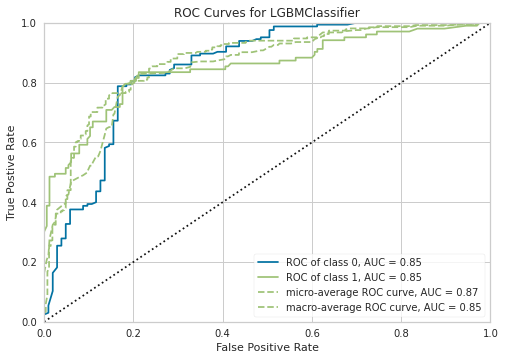

In [11]:
plot_model(tuned_lgbm, plot='auc')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


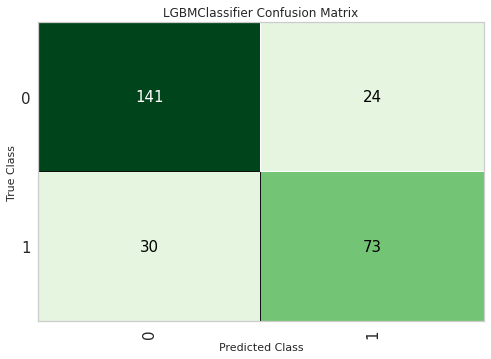

In [12]:
plot_model(tuned_lgbm, plot='confusion_matrix')

## Evaluate model

In [ ]:
evaluate_model(tuned_lgbm)

## Predict

In [13]:
fixed_model = finalize_model(tuned_lgbm)

In [15]:
test_data = pd.read_csv("/opt/notebook/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
result = predict_model(fixed_model, data=test_data)
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0385
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2695
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0922
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1598
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.4653
